In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from ema_workbench.analysis import parcoords
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from sideFunctions import combineResults, pairsPlotEMA, plotHeatmap, parallelPlot, minimizeDF, getDf, getScenarios

dirname = os.path.dirname(os.path.abspath('__file__'))
resultFolder = os.path.join(dirname, 'Results')
figureFolder = os.path.join(resultFolder, 'Figures')

/home/martijn/Documents/Work/CoronaPersonalStealing/NoveltySearchEMA/venv/lib/python3.8/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [3]:
nsDf = getDf(3, True)
nsDfMax = getDf(3, True,prefix='AllMax')
nsDfMin = getDf(3, True,prefix='AllMin')
# print(nsDf.head())

In [4]:
lhcDf = getDf(3, False)
# print(lhcDf.head())

In [9]:
# lhcDfCompare = lhcDf[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]
# nsDfCompare = nsDf[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]

# lhcDfCompare = lhcDf[['max_P', 'utility', 'inertia', 'reliability']]
lhcDfCompare = nsDfMax[['max_P', 'utility', 'inertia', 'reliability']]
nsDfCompare = nsDf[['max_P', 'utility', 'inertia', 'reliability']]

df_diff = pd.concat([nsDfCompare,lhcDfCompare]).drop_duplicates(keep=False)
# df_diff_2 = pd.concat([df_diff,lhcDfCompare]).drop_duplicates(keep=False)
print(len(df_diff))
print(len(lhcDfCompare))
print(len(nsDfCompare))

60
37
23


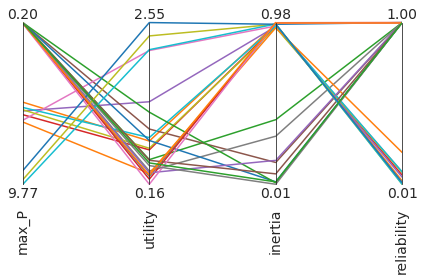

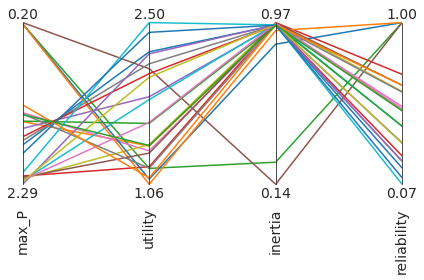

In [4]:
lhcDfMin = minimizeDF(lhcDf, 15)
parallelPlot(lhcDfMin, 'LHC-Experiment_Policy3-nfe1000000')
parallelPlot(nsDf, 'NoveltySearch-Experiment_Policy3-nfe1000000')

In [ ]:

# limitLHC = pd.Series([lhcDfMin.min(), lhcDfMin.max()])
lhcDfMinTest = lhcDfMin[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]
nsDfTest = nsDf[['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability']]
# print(lhcDfMinTest.head())
# print(nsDfTest.head())
minlist = []
maxlist = []
for (colName, colDat) in nsDfTest.iteritems():
    # print(str(nsDfTest[colName])+" compared to "+str(lhcDfMinTest[colName]))
    minlist.append(min(nsDfTest[colName].min(), lhcDfMinTest[colName].min()))
    maxlist.append(max(nsDfTest[colName].max(), lhcDfMinTest[colName].max()))
limit = pd.DataFrame([minlist, maxlist], columns=['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability'])
# print(limit.head())
# limitNs = pd.Series([nsDfTest.min(), nsDfTest.max()], index=['b', 'q', 'mean', 'stdev', 'delta', 'max_P', 'utility', 'inertia', 'reliability'])
# print(limitNs.axes)
# for index, row in limitNs.items():
#     print(row)
# print(limitLHC)
# print(limitNs)

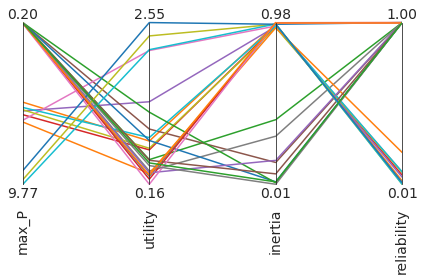

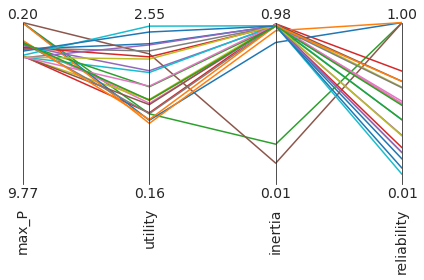

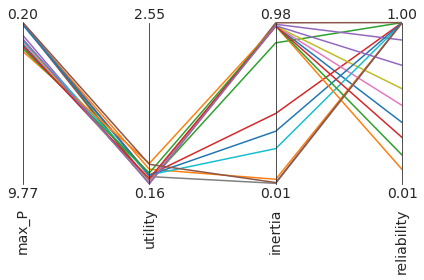

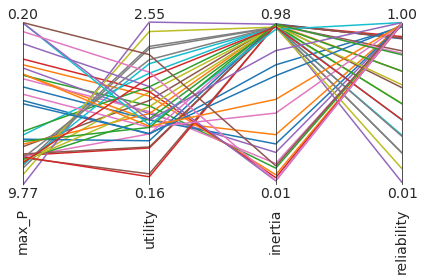

In [7]:
parallelPlot(lhcDfMin, 'LHC-Experiment_Policy3-nfe1000000-normalized', limits=limit)
parallelPlot(nsDf, 'NoveltySearch-Experiment_Policy3-nfe1000000-normalized', limits=limit)
parallelPlot(nsDfMin, 'NoveltySearch-Experiment_Policy3-nfe1000000-allMin-normalized', limits=limit)
parallelPlot(nsDfMax, 'NoveltySearch-Experiment_Policy3-nfe1000000-allMax-normalized', limits=limit)

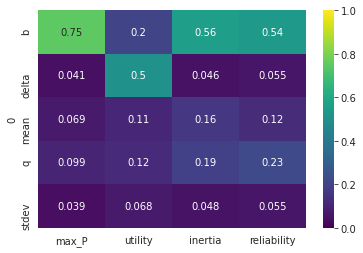

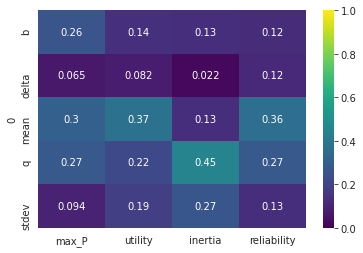

In [11]:
lhcDfMin = minimizeDF(lhcDf, 1000)
plotHeatmap(lhcDfMin, 'LHC-Experiment_Policy3-nfe1000000')
plotHeatmap(nsDf, 'NoveltySearch-Experiment_Policy3-nfe1000000')

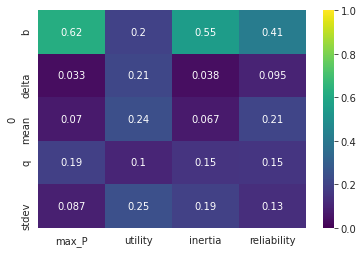

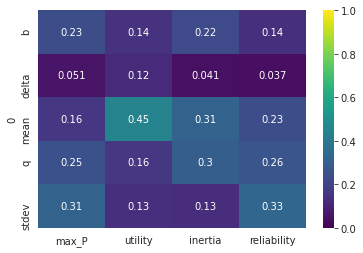

In [12]:
plotHeatmap(nsDfMax, 'NoveltySearch-Experiment_Policy3-nfe1000000-allMax')
plotHeatmap(nsDfMin, 'NoveltySearch-Experiment_Policy3-nfe1000000-allMin')

In [8]:

lhcLim = pairsPlotEMA(lhcDfMin, 'LHC-Experiment_Policy3-nfe1000000')
nsLim = pairsPlotEMA(nsDf, 'NoveltySearch-Experiment_Policy3-nfe1000000')

KeyError: "['type'] not in index"

In [10]:
pairsPlotEMA(lhcDfMin, 'LHC-Experiment_Policy3-nfe1000000-normalized', lhcLim)
pairsPlotEMA(nsDf, 'NoveltySearch-Experiment_Policy3-nfe1000000-normalized', lhcLim)

AttributeError: 'tuple' object has no attribute 'legend'

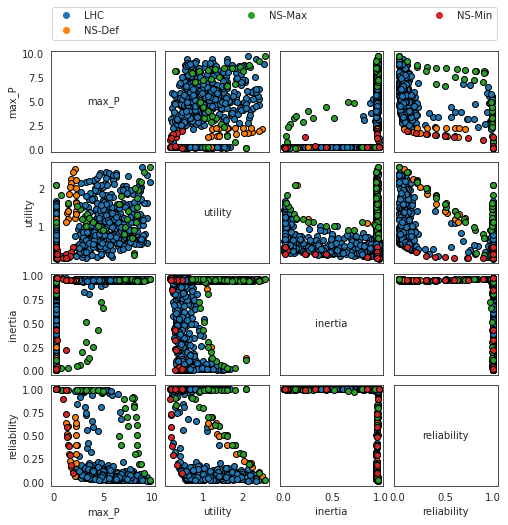

{('max_P', 'max_P'): <AxesSubplot:ylabel='max_P'>,
 ('max_P', 'utility'): <AxesSubplot:>,
 ('max_P', 'inertia'): <AxesSubplot:>,
 ('max_P', 'reliability'): <AxesSubplot:>,
 ('utility', 'max_P'): <AxesSubplot:ylabel='utility'>,
 ('utility', 'utility'): <AxesSubplot:>,
 ('utility', 'inertia'): <AxesSubplot:>,
 ('utility', 'reliability'): <AxesSubplot:>,
 ('inertia', 'max_P'): <AxesSubplot:ylabel='inertia'>,
 ('inertia', 'utility'): <AxesSubplot:>,
 ('inertia', 'inertia'): <AxesSubplot:>,
 ('inertia', 'reliability'): <AxesSubplot:>,
 ('reliability', 'max_P'): <AxesSubplot:xlabel='max_P', ylabel='reliability'>,
 ('reliability', 'utility'): <AxesSubplot:xlabel='utility'>,
 ('reliability', 'inertia'): <AxesSubplot:xlabel='inertia'>,
 ('reliability', 'reliability'): <AxesSubplot:xlabel='reliability'>}

In [10]:
lhcDfMin = minimizeDF(lhcDf, 1000)
nsDf['type'] = "NS-Def"
nsDfMin['type'] = "NS-Min"
nsDfMax['type'] = "NS-Max"
lhcDfMin['type'] = "LHC"
conDf = pd.concat([nsDf, nsDfMin, nsDfMax, lhcDfMin])
# print(conDf)
pairsPlotEMA(conDf, 'Experiment_Policy3-nfe1000000-combined', groupby='type')

In [10]:
getScenarios(nsDf)

Scenario('scenarioReference0', b=0.45, q=2.0000516634870174, mean=0.0417326606927151, stdev=0.001, delta=0.99),
Scenario('scenarioReference1', b=0.4497491085701322, q=2.0225391303326306, mean=0.0401834026805645, stdev=0.0014205556955382, delta=0.989999999827974),
Scenario('scenarioReference2', b=0.4295300901614252, q=2.0928929199021318, mean=0.0100105587196186, stdev=0.0020955715064952, delta=0.99),
Scenario('scenarioReference3', b=0.3876543116254546, q=2.0000005349717425, mean=0.0172979273610349, stdev=0.001, delta=0.989995929125022),
Scenario('scenarioReference4', b=0.45, q=2.0, mean=0.0391006436201115, stdev=0.001, delta=0.99),
Scenario('scenarioReference5', b=0.45, q=4.5, mean=0.01, stdev=0.0049473507109634, delta=0.99),
Scenario('scenarioReference6', b=0.4499926234297814, q=2.0011058332487965, mean=0.0385175666550282, stdev=0.001, delta=0.99),
Scenario('scenarioReference7', b=0.45, q=2.0111320243476745, mean=0.0413654640233504, stdev=0.001, delta=0.99),
Scenario('scenarioReference